In [198]:
from __future__ import division, print_function
import kf_book.pf_internal as pf_internal
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from filterpy.stats import plot_gaussian_pdf
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
from collections import Counter

In [9]:
from numpy.random import uniform

def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles

In [10]:
########################
##### Predict Step #####
########################

def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist

In [11]:
#######################
##### Update Step #####
#######################


def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # avoid round-off to zero
    weights /= sum(weights) # normalize

In [12]:
#################################
##### State Estimation Step #####
#################################

def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

In [13]:
#############################
#### Particle Resampling ####
#############################

def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)
    
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))    

def neff(weights):
    return 1. / np.sum(np.square(weights))

In [292]:
####################################
#### Transition Matrix Training ####
####################################

def PredLookup(item, index, predlist):
    # print(index)
    # print(predlist[index - 1][1])
    if (predlist[index - 1][1] == item):
        return False;
    else:
        return True;
    

agenttrace = '../4jul11p.csv'
f = open(agenttrace)
#print(f.readlines)
oracle = []
gridized_data = []
gridsize = 0.5

xbins = 12
ybins = 20

# Based on Smart Condo Dimension and orientation:
TMatrix = np.zeros((xbins * ybins, xbins * ybins))
TLookupTable = []

for x in range(xbins):
    for y in range(ybins):
        TLookupTable.append("[" + str(x) + ", " + str(y) + "]")
        
with open(agenttrace, 'r') as user_data:
    reader = csv.reader(user_data, delimiter=',', quotechar=',')
    for row in reader:
        if (reader.line_num > 1):
            oracle.append([float(row[4]), float(row[5])])
            
for d in oracle:
    gridized_data.append([int(np.floor(d[0]/gridsize)), int(np.floor(d[1]/gridsize))])        
    
for x in range(xbins):
    for y in range(ybins):
        # find (x, y)s in gridized_data
        indices = [index for index, item in enumerate(gridized_data) if item == [x, y] and 
                   PredLookup(item, index, list(zip(gridized_data[1:], gridized_data)))]  
        
        # foreach (x, y): find their next successor; N = total number of successors 
        if not indices:
            print("Agent was not in location [" + str(x) + ", " + str(y) + "] at all")
        else:
            # print([x, y])
            # print(operator.itemgetter(*indices)(gridized_data))
            print(indices)
            # print(gridized_data[for i in indices])
            
            print("shadan")
            N = len(indices)
            next_indices = [x + 1 for x in indices]
            next_states = [operator.itemgetter(*next_indices)(gridized_data)]
            
            print(type(next_states))
            
            print("golestan")
            
            for next_state in next_states:
                n = next_states.count(next_state)
                # print(TLookupTable)
                # print(TLookupTable.index(next_state))
                
                TLookupTable.index(str(next_state))
                cell = TLookupTable.index(str(next_state))
                TMatrix[x, cell] = float(n / N)

Agent was not in location [0, 0] at all
Agent was not in location [0, 1] at all
Agent was not in location [0, 2] at all
Agent was not in location [0, 3] at all
Agent was not in location [0, 4] at all
Agent was not in location [0, 5] at all
Agent was not in location [0, 6] at all
Agent was not in location [0, 7] at all
Agent was not in location [0, 8] at all
Agent was not in location [0, 9] at all
Agent was not in location [0, 10] at all
Agent was not in location [0, 11] at all
Agent was not in location [0, 12] at all
Agent was not in location [0, 13] at all
Agent was not in location [0, 14] at all
Agent was not in location [0, 15] at all
Agent was not in location [0, 16] at all
Agent was not in location [0, 17] at all
Agent was not in location [0, 18] at all
Agent was not in location [0, 19] at all
Agent was not in location [1, 0] at all
Agent was not in location [1, 1] at all
Agent was not in location [1, 2] at all
Agent was not in location [1, 3] at all
Agent was not in location [1, 

ValueError: '([1, 14], [1, 13], [1, 13], [1, 13])' is not in list

In [291]:
TLookupTable.index(str(next_state))

26

In [293]:
next_state

([1, 14], [1, 13], [1, 13], [1, 13])

In [284]:
TLookupTable

['[0, 0]',
 '[0, 1]',
 '[0, 2]',
 '[0, 3]',
 '[0, 4]',
 '[0, 5]',
 '[0, 6]',
 '[0, 7]',
 '[0, 8]',
 '[0, 9]',
 '[0, 10]',
 '[0, 11]',
 '[0, 12]',
 '[0, 13]',
 '[0, 14]',
 '[0, 15]',
 '[0, 16]',
 '[0, 17]',
 '[0, 18]',
 '[0, 19]',
 '[1, 0]',
 '[1, 1]',
 '[1, 2]',
 '[1, 3]',
 '[1, 4]',
 '[1, 5]',
 '[1, 6]',
 '[1, 7]',
 '[1, 8]',
 '[1, 9]',
 '[1, 10]',
 '[1, 11]',
 '[1, 12]',
 '[1, 13]',
 '[1, 14]',
 '[1, 15]',
 '[1, 16]',
 '[1, 17]',
 '[1, 18]',
 '[1, 19]',
 '[2, 0]',
 '[2, 1]',
 '[2, 2]',
 '[2, 3]',
 '[2, 4]',
 '[2, 5]',
 '[2, 6]',
 '[2, 7]',
 '[2, 8]',
 '[2, 9]',
 '[2, 10]',
 '[2, 11]',
 '[2, 12]',
 '[2, 13]',
 '[2, 14]',
 '[2, 15]',
 '[2, 16]',
 '[2, 17]',
 '[2, 18]',
 '[2, 19]',
 '[3, 0]',
 '[3, 1]',
 '[3, 2]',
 '[3, 3]',
 '[3, 4]',
 '[3, 5]',
 '[3, 6]',
 '[3, 7]',
 '[3, 8]',
 '[3, 9]',
 '[3, 10]',
 '[3, 11]',
 '[3, 12]',
 '[3, 13]',
 '[3, 14]',
 '[3, 15]',
 '[3, 16]',
 '[3, 17]',
 '[3, 18]',
 '[3, 19]',
 '[4, 0]',
 '[4, 1]',
 '[4, 2]',
 '[4, 3]',
 '[4, 4]',
 '[4, 5]',
 '[4, 6]',
 '[

In [272]:
next_states.count([1, 6])

1

In [245]:
next_states = operator.itemgetter(*next_indices)(gridized_data)
print(next_states[1])

[8, 1]


In [197]:
indices = [2368, 2572, 2584, 2919]
a = [x + 1 for x in indices]

print(indices)
print(a)

[2368, 2572, 2584, 2919]
[2369, 2573, 2585, 2920]


In [256]:
z = ['blue', 'red', 'blue', 'yellow', 'blue', 'red']
type(z)

list

[[4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [5, 11], [6, 12], [6, 13], [7, 13], [8, 14], [9, 15], [9, 16], [10, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [8, 14], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [8, 14], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [11, 17], [10, 17], [9, 16], [8, 15], [7, 14], [6, 13], [5, 13], [4, 12], [3, 11], [2, 10], [2, 10], [3, 10], [3, 10], [3, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4, 10], [4,

In [22]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats

def run_pf1(N, iters=18, sensor_std_err=.1, do_plot=True, plot_particles=False, xlim=(0, 20), ylim=(0, 20), initial_x=None):
    
    #TODO: (Sensor Model)
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    plt.figure()
   
    # create particles and weights
    particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)    
    weights = np.ones(N) / N

    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    robot_pos = np.array([0., 0.])
    for x in range(iters):
        #TODO: (Motion Model)
        robot_pos += (1, 1)

        # distance from subject to each landmark
        #TODO: Need to be changed!
        zs = (norm(landmarks - robot_pos, axis=1) + (randn(NL) * sensor_std_err))

        
        # move diagonally forward to (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # incorporate measurements
        update(particles, weights, z = zs, R = sensor_std_err, landmarks = landmarks)
        
        
        
        
        
        
        
        
        # resample if too few effective particles
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], color='k', marker=',', s=1)
        
        p1 = plt.scatter(robot_pos[0], robot_pos[1], marker='+', color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'PF'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('final position error, variance:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

final position error, variance:
	 [-0.10621456  0.1061402 ] [0.00859646 0.00757081]


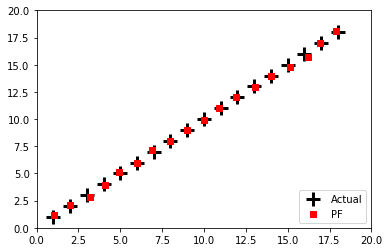

In [23]:
from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=False)